In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import numpy as np
from PIL import Image
from scipy.ndimage import gaussian_gradient_magnitude
from wordcloud import WordCloud, ImageColorGenerator

## wordcloud a partir de las letras de una cancion 
    autor: metallica
    cancion: king nothing

In [2]:
url = "https://www.azlyrics.com/lyrics/metallica/kingnothing.html"

In [3]:
page = requests.get(url)

In [4]:
soup = BeautifulSoup(page.content,'html.parser')

In [12]:
##  el div que estoy buscando es el unico que no tiene alguna clase
##  div.class('')
lyrics = soup.find_all('div',class_='')
texto = []

for line in lyrics:
    texto.append(line.text.replace('\n',' '))
texto = " ".join(texto)
texto

'  \r Wish I may, wish I might Have this I wish tonight Are you satisfied? Dig for gold, dig for fame You dig to make your name Are you pacified?  All the wants you waste All the things you’ve chased  Then it all crashes down And you break your crown And you point your finger But there’s no one around Just want one thing Just to play the king But the castle’s crumbled And you’re left with just a name  Where’s your crown, King Nothing? Where’s your crown?  Hot and cold, bought and sold A heart as hard as gold Are you satisfied? Wish I might, wish I may You wish your life away Are you pacified?  All the wants you waste All the things you’ve chased  Then it all crashes down And you break your crown And you point your finger But there’s no one around Just want one thing Just to play the king But the castle’s crumbled And you’re left with just a name Where’s your crown, King Nothing? Where’s your crown?  I wish I may, I wish I might Have this wish I wish tonight I want that star, I want it 

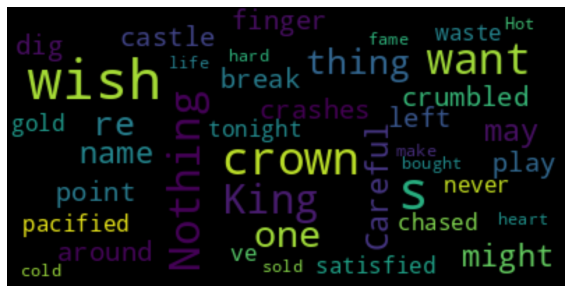

In [13]:
# mostrando el wordcloud de las lyrics
wc = WordCloud(max_font_size=40,max_words=40,background_color='black').generate(texto)
plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation='gaussian')

plt.axis('off')
plt.show()

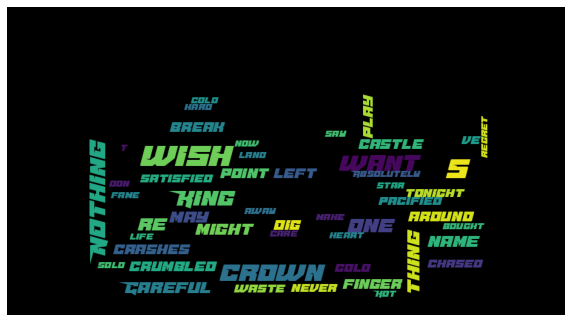

In [21]:
from wordcloud import STOPWORDS
crown_color = np.array(Image.open('./crown.png'))
crown_color = crown_color[::3, ::3]
crown_mask = crown_color.copy()
crown_mask[crown_mask.sum(axis=2) == 0] = 255
edges = np.mean([gaussian_gradient_magnitude(crown_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
crown_mask[edges > .08] = 255
wc = WordCloud(font_path='Masked Hero.ttf',max_words=2000,stopwords=STOPWORDS, mask=crown_mask, max_font_size=40)
wc.generate(texto)
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wc)

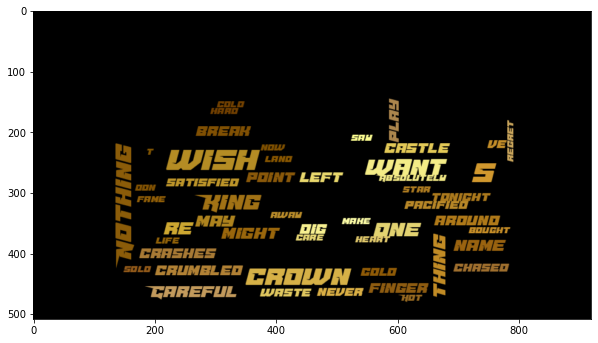

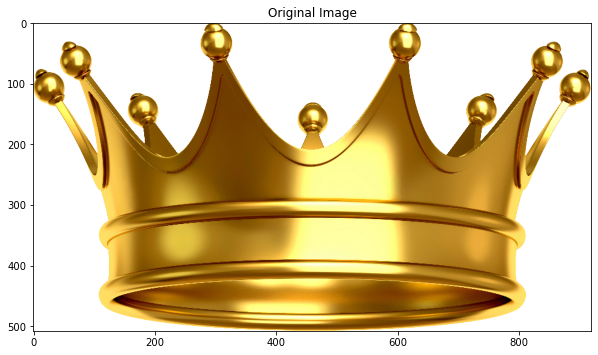

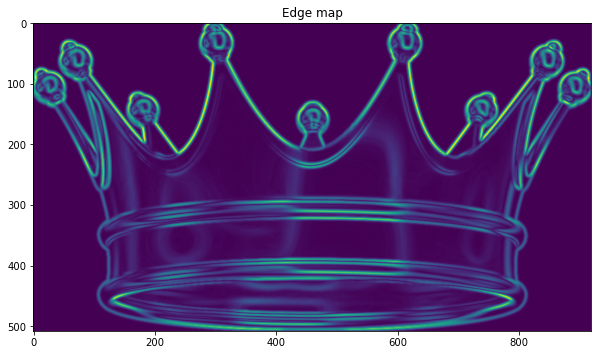

In [22]:
# create coloring from image
image_colors = ImageColorGenerator(crown_color)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
wc.to_file("crown_new.png")

plt.figure(figsize=(10, 10))
plt.title("Original Image")
plt.imshow(crown_color)

plt.figure(figsize=(10, 10))
plt.title("Edge map")
plt.imshow(edges)
plt.show()